# Análise dos Dados do Airbnb - Sydney

Se você ainda não conhece o Airbnb, chegou a hora de descobrir como essa plataforma revolucionou a forma como viajamos! ✈️🏡

O Airbnb é um serviço online que conecta anfitriões, que disponibilizam acomodações, a viajantes em busca de um lugar para se hospedar. Seja um quarto simples ou uma casa inteira, a plataforma permite que qualquer pessoa alugue seu espaço para hóspedes do mundo todo, tornando a experiência mais acessível e personalizada.

Nesta análise, vamos explorar os dados do Inside Airbnb em Sydney, uma plataforma que fornece informações detalhadas sobre imóveis anunciados no site. O foco será a identificação de outliers, ou seja, valores que fogem do padrão, como preços muito altos ou propriedades com regras incomuns. Isso pode nos ajudar a entender melhor o mercado e identificar possíveis tendências ou anomalias nos anúncios! 📊🔎

In [1]:
# Importando os pacotes necessários 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
# Configurando a visualização
sns.set_palette('Blues_r')
sns.set_style('darkgrid')

In [2]:
# Importando os dados
df_sdy = pd.read_csv('listings.csv')

# Verificando as primeiras entradas
df_sdy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,11156,An Oasis in the City,40855,Colleen,NaN,Sydney,-33.86767,151.22497,Private room,65.0,90,193,2020-03-13,1.07,1,364,0,NaN
1,14250,Manly Harbour House,55948,Heidi,NaN,Manly,-33.80084,151.26378,Entire home/apt,600.0,14,3,2021-06-01,0.03,2,13,0,Exempt
2,15253,Unique Designer Rooftop Apartment in City Loca...,59850,Morag,NaN,Sydney,-33.87964,151.21680,Private room,118.0,1,581,2024-08-20,3.81,1,248,66,PID-STRA-24061-7
3,58506,"Studio Yindi @ Mosman, Sydney",279955,John,NaN,Mosman,-33.81748,151.23484,Entire home/apt,190.0,2,419,2024-09-01,2.51,1,193,30,PID-STRA-2810
4,68999,A little bit of Sydney - Australia,333581,Bryan,NaN,Hornsby,-33.72966,151.05226,Private room,115.0,1,108,2024-06-02,0.67,1,318,11,PID-STRA-9081


In [3]:
# Verificando as dimensões
df_sdy.shape

(16228, 18)

In [4]:
# Verificando as tipos
df_sdy.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

Antes de iniciar a análise de outliers, é importante verificar se os tipos de dados das colunas estão corretos. Neste caso, as variáveis parecem estar bem definidas, sem necessidade de ajustes.

### Dicionário de dados!

* _id_:  Identificador único do imóvel.
* _name_:  Nome do imóvel anunciado.
* _host_id_:  Identificador único do anfitrião.
* _host_name_:  Nome do anfitrião.
* _neighbourhood_group_:  Coluna sem valores válidos.
* _neighbourhood_:  Nome do bairro onde o imóvel está localizado.
* _latitude_:  Coordenada geográfica de latitude do imóvel.
* _longitude_:  Coordenada geográfica de longitude do imóvel.
* _room_type_:  Tipo de acomodação oferecida.
* _price_:  Valor da diária do imóvel.
* _minimum_nights_:  Número mínimo de noites exigido para reserva.
* _number_of_reviews_:  Quantidade total de avaliações recebidas pelo imóvel.
* _last_review_:  Data da última avaliação registrada.
* _reviews_per_month_:  Média de avaliações recebidas por mês.
* _calculated_host_listings_count_:  Quantidade de imóveis cadastrados pelo mesmo anfitrião.
* _availability_365_:  Número de dias que o imóvel está disponível para reserva ao longo do ano.

In [5]:
# Mostrando a quantidade de dados ausentes por variável
(df_sdy.isnull().sum()).sort_values(ascending=False)

neighbourhood_group               16228
reviews_per_month                  2987
last_review                        2987
license                            1505
price                              1395
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
name                                  0
minimum_nights                        0
number_of_reviews                     0
host_name                             0
host_id                               0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
id                                    0
dtype: int64

A contagem de valores ausentes revela que a coluna **neighbourhood_group** está completamente vazia, tornando-se irrelevante para a análise. Além dela, outras colunas também apresentam dados ausentes em diferentes proporções, como reviews_per_month, last_review, license e price.

Dado que neighbourhood_group possui 100% de valores nulos, sua remoção é recomendada. Já para as demais colunas com dados ausentes, é necessário avaliar se a ausência dessas informações compromete a análise ou se é possível tratá-las de forma adequada, seja preenchendo os valores ausentes ou lidando com eles de outra maneira.

In [6]:
# Excluindo colunas com dados faltantes
df_sdy.drop(columns=['neighbourhood_group', 'reviews_per_month', 'last_review', 'license'], inplace=True)

# Preenchendo os dados ausentes com mediana
df_sdy['price'].fillna(df_sdy['price'].median(), inplace=True)

In [7]:
# Verificando a distribuição estatística
df_sdy[['price', 'minimum_nights', 'number_of_reviews',
        'calculated_host_listings_count', 'availability_365']].describe().round(2)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,16228.00,16228.00,16228.00,16228.00,16228.00
mean,341.10,16.57,34.99,17.73,165.55
std,948.76,35.75,67.28,35.68,118.67
min,16.00,1.00,0.00,1.00,0.00
25%,146.00,2.00,1.00,1.00,66.00
50%,208.00,2.00,10.00,2.00,147.00
75%,315.00,5.00,38.00,16.00,269.00
max,99999.00,600.00,1127.00,200.00,365.00


Algumas anomalias já se destacam na análise:
* A variável **price**, que representa o preço da diária dos imóveis, tem um mínimo de 16. No entanto, ao observar os quartis, notamos que o terceiro quartil (Q3) está em 315, enquanto o valor máximo chega a 99.999. Isso indica claramente a presença de outliers!
* A variável **minimum_nights** possui um valor máximo de 600 noites, sendo que Q3 está em apenas 5 noites. Isso sugere a existência de outliers também nessa variável.
* As variáveis **number_of_reviews**, **calculated_host_listings_count** e **availability_365** podem conter outliers, mas, por ora, não iremos nos aprofundar nelas.

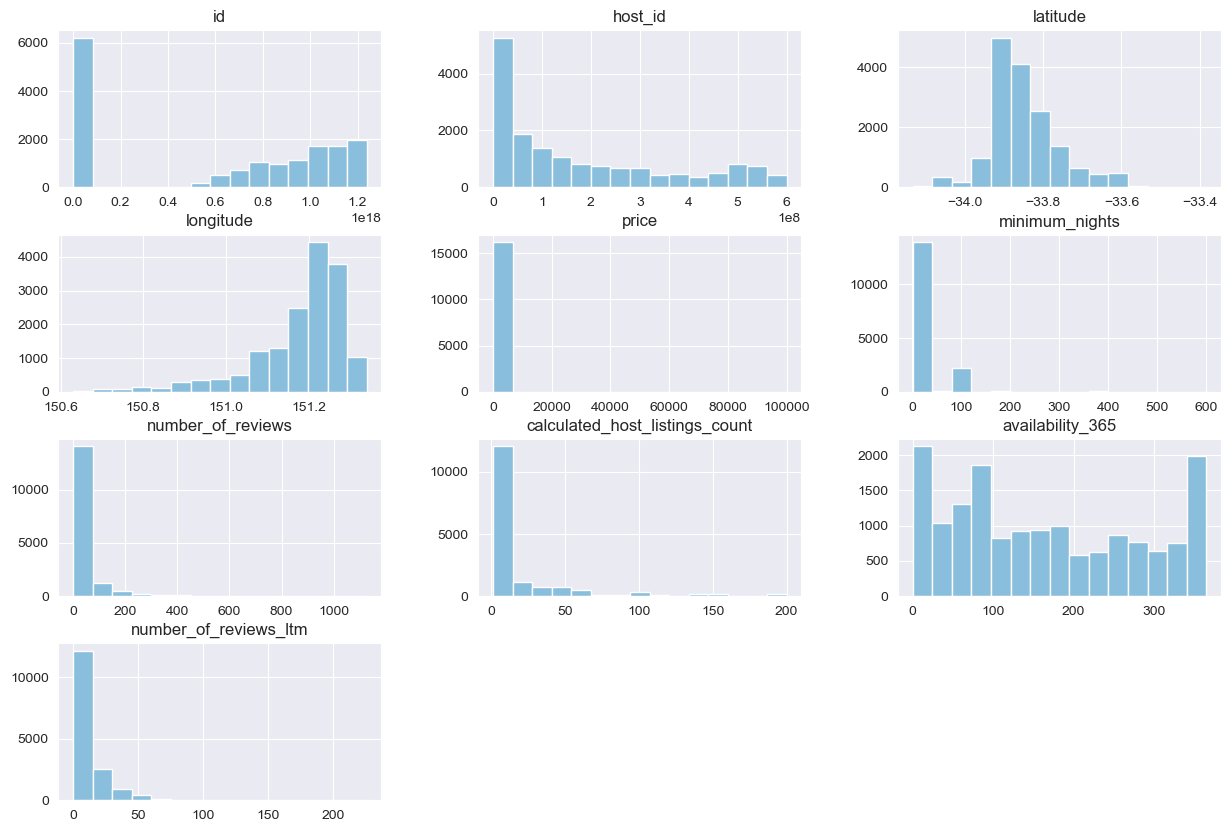

In [8]:
# Verificando as distribuições (Histograma)
cl = sns.color_palette()
blues = cl[3]
df_sdy.hist(bins=15, figsize=(15,10), color=blues);

Ao analisar os histogramas, fica evidente a presença de outliers. Para tratá-los, seguiremos os seguintes passos:

* Determinar Q1 e Q3 para as variáveis que precisam ser ajustadas.
* Calcular o IQR.
* Definir limites com o IQR para estabelecer os limites superior e inferior.
* Remover os outliers: Valores que estiverem fora dos limites serão considerados outliers e removidos da análise.

In [9]:
# Identificando os outliers para a variável 'price'
q1_price = df_sdy.price.quantile(.25)
q3_price = df_sdy.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR price: ', IQR_price)

# Definindo os limites
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite Superior de price:', sup_price)
print('Limite Inferior de price:', inf_price)

IQR price:  169.0
Limite Superior de price: 568.5
Limite Inferior de price: -107.5


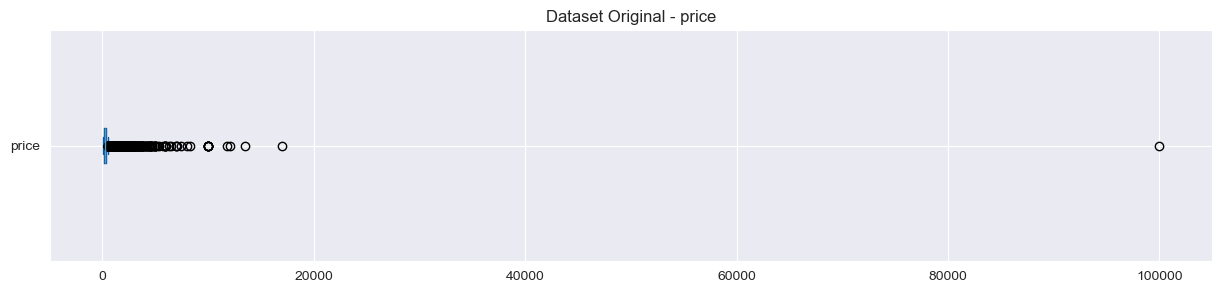

O dataset possui 16228 colunas
São 1846 entradas acima de 568.5
Representam 11.38% do dataset


In [10]:
# Verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df_sdy.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()
print('O dataset possui {} colunas'.format(df_sdy.shape[0]))
print('São {} entradas acima de 568.5'.format(len(df_sdy[df_sdy.price > 568.5])))
print('Representam {:.2f}% do dataset'.format((len(df_sdy[df_sdy.price > 568.5]) / df_sdy.shape[0])*100))

In [11]:
# Identificando os outliers para a variável minimum_nights
q1_minimum_nights = df_sdy.minimum_nights.quantile(.25)
q3_minimum_nights = df_sdy.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR minimum_nights:', IQR_minimum_nights)

# Definindo os limites
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite Superior de minimum_nights:', sup_minimum_nights)
print('Limite Inferior de minimum_nights:', inf_minimum_nights)

IQR minimum_nights: 3.0
Limite Superior de minimum_nights: 9.5
Limite Inferior de minimum_nights: -2.5


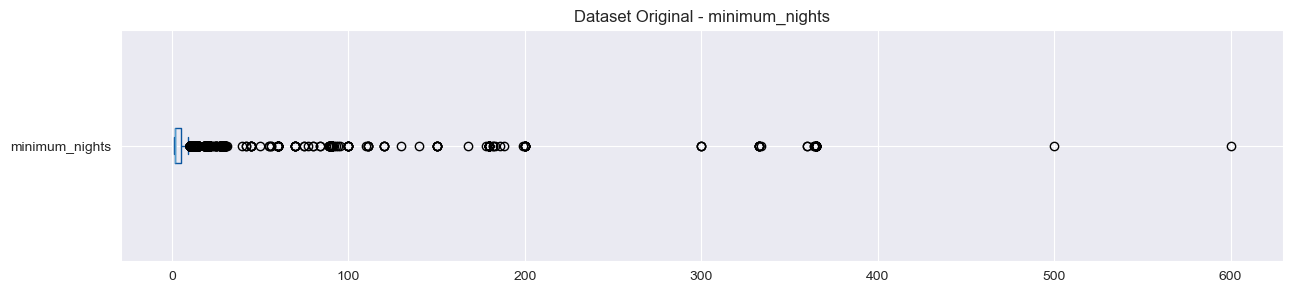

O dataset possui 16228 colunas
São 3098 entradas acima de 9.5
Representam 19.09% do dataset


In [12]:
# Verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df_sdy.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Original - minimum_nights')
plt.show()
print('O dataset possui {} colunas'.format(df_sdy.shape[0]))
print('São {} entradas acima de 9.5'.format(len(df_sdy[df_sdy.minimum_nights >  9.5])))
print('Representam {:.2f}% do dataset'.format((len(df_sdy[df_sdy.minimum_nights >  9.5]) / df_sdy.shape[0])*100))

In [13]:
# Limpando o dataset
df_clean = df_sdy.copy()

df_clean.drop(df_clean[df_clean.price > 568.5].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 9.0].index, axis=0, inplace=True)

print('Shape antes da limpeza:', df_sdy.shape)
print('Shape após a limpeza:', df_clean.shape)

Shape antes da limpeza: (16228, 14)
Shape após a limpeza: (11664, 14)


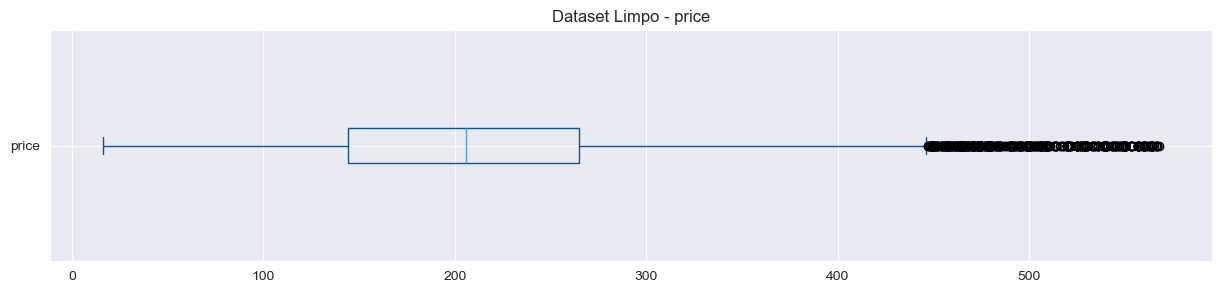

Tamanho original: 16228 colunas
Tamanho atual: 11664 colunas


In [14]:
# Verificando o conjunto limpo
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - price')
plt.show()

print('Tamanho original: {} colunas'.format(df_sdy.shape[0]))
print('Tamanho atual: {} colunas'.format(df_clean.shape[0]))

In [15]:
# Verificando a distribuição estatística dos dados limpos
df_clean[['price', 'minimum_nights', 'number_of_reviews',
        'calculated_host_listings_count', 'availability_365']].describe().round(2)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,11664.00,11664.00,11664.00,11664.00,11664.00
mean,215.75,2.38,43.18,18.62,151.84
std,107.34,1.50,74.87,36.99,113.47
min,16.00,1.00,0.00,1.00,0.00
25%,144.00,1.00,3.00,1.00,58.00
50%,206.00,2.00,15.00,3.00,129.00
75%,265.00,3.00,49.00,18.00,252.00
max,568.00,9.00,1127.00,200.00,365.00


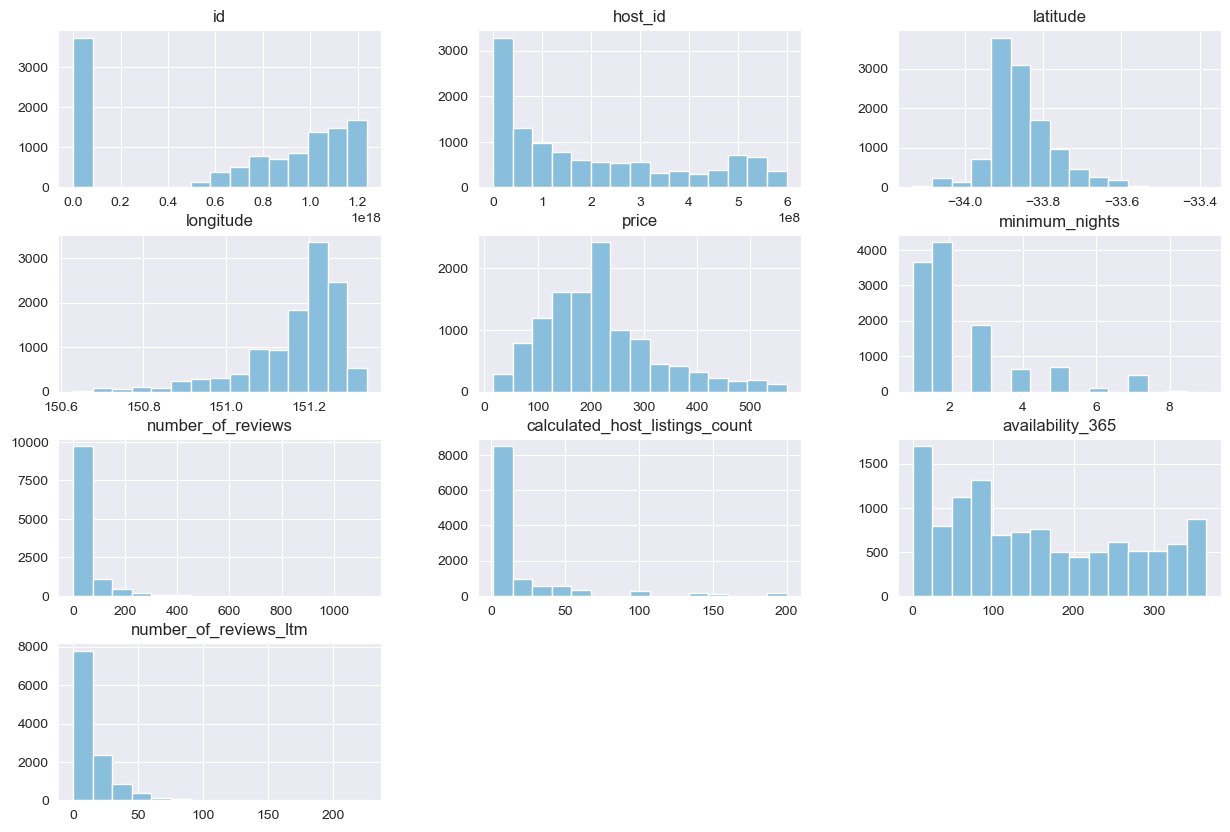

In [16]:
df_clean.hist(bins=15, figsize=(15,10), color=cor_escolhida);

Agora conseguimos visualizar melhor a distribuição dos nossos dados. Alguns pontos importantes:

* A mediana da variável **price** foi pouco impactada pela remoção dos _outliers_, demonstrando a robustez dessa métrica em relação a valores extremos.
* Após a limpeza, os dados passaram a respeitar melhor as regras definidas no início da análise, garantindo maior qualidade e confiabilidade.
* A média da variável **price** foi significativamente reduzida, evidenciando a sensibilidade dessa métrica à presença de outliers.

In [18]:
# Quantidade de cada 'tipo' de imóvel disponível
df_clean['room_type'].value_counts()

room_type
Entire home/apt    9264
Private room       2288
Hotel room           73
Shared room          39
Name: count, dtype: int64

In [31]:
# Porcentagem de cada 'tipo' de imóvel disponível
df_clean['room_type'].value_counts() / len(df_clean)

room_type
Entire home/apt    0.794239
Private room       0.196159
Hotel room         0.006259
Shared room        0.003344
Name: count, dtype: float64

In [30]:
# Média de preço do top 10 localidades mais caras
df_clean.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)[:10]

neighbourhood
Pittwater           277.023256
Manly               269.441634
Woollahra           252.623003
Warringah           246.012422
Waverley            245.295562
Mosman              245.072000
Sutherland Shire    242.226027
North Sydney        238.439141
Randwick            235.011609
Camden              234.582090
Name: price, dtype: float64

In [21]:
# Contagem de imóveis por localidade
df_clean['neighbourhood'].value_counts()  

neighbourhood
Sydney              2785
Waverley            1059
Randwick             603
Manly                514
Warringah            483
Pittwater            430
North Sydney         419
Marrickville         364
Auburn               338
Woollahra            313
Leichhardt           299
Sutherland Shire     292
Hornsby              261
Ryde                 243
The Hills Shire      228
Botany Bay           222
Parramatta           220
Blacktown            220
Rockdale             205
Ku-Ring-Gai          200
Canada Bay           192
Willoughby           192
Bankstown            172
Fairfield            147
Liverpool            142
Burwood              139
Penrith              128
Mosman               125
Canterbury           112
Ashfield             108
Strathfield           85
Campbelltown          78
Lane Cove             75
Holroyd               68
Camden                67
Hurstville            64
City Of Kogarah       58
Hunters Hill          14
Name: count, dtype: int64

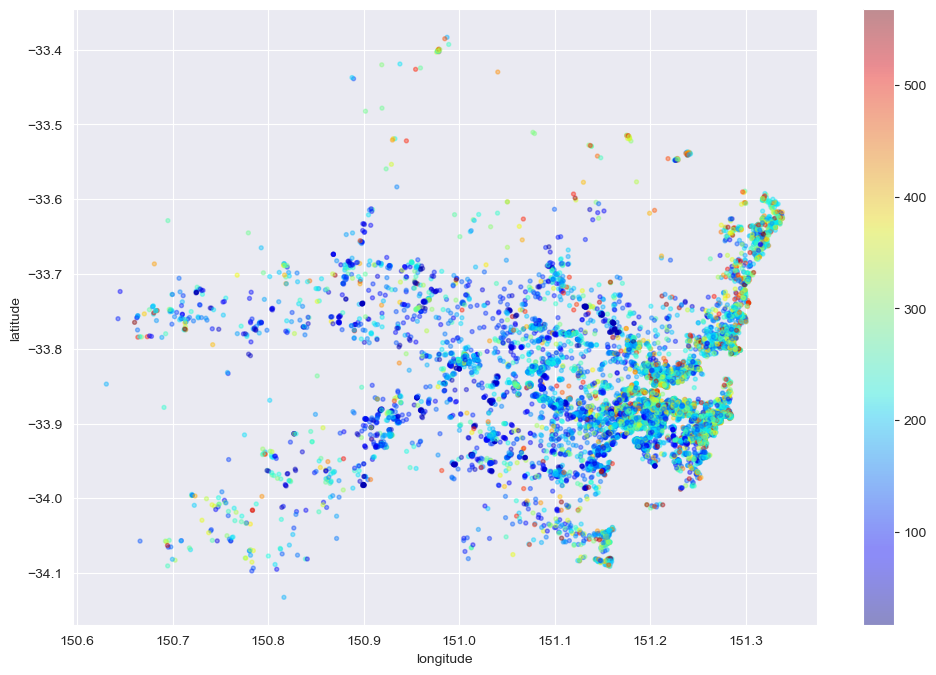

In [22]:
# Mapa de dispersão que representa a distribuição geográfica dos imóveis do Airbnb em Sydney, Austrália
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusão da Análise

Após a remoção dos outliers, conseguimos uma visão mais clara da distribuição dos imóveis e preços. A limpeza dos dados teve um impacto mínimo na mediana do preço, reforçando sua robustez como métrica central. No entanto, a média do preço foi significativamente reduzida, destacando a sensibilidade desse atributo a valores extremos.

Além disso, observamos que a maioria dos imóveis disponíveis são do tipo **"Entire home/apt"**, representando aproximadamente **79%** das ofertas. Já os tipos **"Hotel room"** e **"Shared room"** possuem baixa representatividade no mercado.

Na análise de preços por localidade, identificamos que **Pittwater**, **Manly** e **Woollahra** possuem os preços médios mais altos, enquanto bairros como **Randwick** e **North Sydney** apresentam valores um pouco menores.

Com essas informações, conseguimos entender melhor a distribuição dos dados e como os outliers podem distorcer as estatísticas, reforçando a importância da limpeza dos dados antes de realizar qualquer inferência. 🚀